# DSCI100 Project: Predicting Usage of a Video Game Research Server

- Name: Rita Yim
- Class: DSCI100 - 003
- Student ID: 93068286
- Session: 2025 Summer Term 1
- Project Question: #2 - To know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

## Familiarization

### Objective 
**To find which "kinds" of players are most likely to contribute a large amount of data.**

### The Data Sets
**The Players Dataset:**
Categorizes each players through 196 observations, and 7 variables. The variables are as followed:

1. **experience**, character: Players' level of experience.
2. **subscribe**, logical: If the player is subscribed to the game. 
3. **hashedEmail**, character: Encrypted email of player.
4. **played_hours**, double: Play time of player.
5. **name**, character: Name of the player.
6. **gender**, character: Gender of the player.
7. **Age**, double: Age of the player.



**The Sessions Dataset:** 
Contains 1535 observations and 5 variables. It lists the time that each player logged online and offline. The variables are as followed:

1. **hashedEmail**, character: Encrypted email of the player.
2. **start_time**, character: Start time of session
3. **end_time**, character: End time of session
4. **original_start_time**, double: Start time in UNIX timestamp format.
5. **original_end_time**, double: Start time in UNIX timestamp format.

Note: A potential issue is an incorrect timezone, meaning that the time & date of sessions are not in PST. This could give us incorrect results if the question was to observe the most populous time. However, this dataset is **NOT** used in this project.



In [2]:
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)

players <- read_csv("players.csv")
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Introduction

Research has shown that video game culture is embedded in the culture of most young people, as they represent a large portion of those who engage virtual video game spaces _(Cipollone, 2014)_. With advancements in technology, games today are more immersive and accessible than ever, spanning consoles, computers, and mobile devices. _Minecraft_ was designed as a pure sandbox-style game, meaning there is no linear narrative structure
that guides players. The game display is very graphically simple, and encourages more interaction with naturalistic or almost agrarian activities, which is what made this video game so popular amongst gamers _(Cipollone, 2014)_. Interested in finding the correlations and patterns in how users interact with a video game, a Computer Science research team at the University of British Columbia led by Professor Frank Wood gathered gameplay data from a bespoke Minecraft server. In order to better understand behavioral patterns, researchers record players' movements as they move through the virtual world. Finding out which player types are most likely to produce significant amounts of data is a key objective of the project, to enable the team to concentrate recruitment efforts on people who will most effectively contribute to the research.

## Methodology

In order to answer the question, "Which kinds of players are most likely to contribute a large amount of data?" we will tackle this as a classification task. Our specific objective was to determine whether a player is a great data provider based on their personal characteristics. We employed a K-Nearest Neighbours (K-NN) classification technique to forecast which categories of individuals are most likely to make significant contributions. We will disregard the `sessions.csv` file because we are more interested in player background than in-game session `players.csv` file and chose the following variables: `Age`, `gender`, `experience`, and `played_hours`. 

`played_hours` will only be used as response variable, to define whether one is a "high data contributor" or not. 

1. First, we will create plots to explore the relationship between age, gender and experience vs played hours respectfully through a visualization plot. We will then use our findings from the plots to determine which predictive model to employ.

2. Secondly, we will classify a "high data contributor" is defined as someone in the top 25% of total hours played. Each observation will be assigned to either "high data contributor" or "low data contributor" in a new column `high_contributor`.

3. Next, data preprocessing was completed by creating a recipe that converted novel categories, created dummy variables for categorical predictors, removed predictors with zero variance and standardized numerical predictors (e.g., Age).

4. Then, we built a model and then determine if the model is a good predictor of whether a user is a "high" or "low" data contributor.

   - In particular, 70% of the data will be used as the training data, while the other 30% will be used as testing data.
   - Using 5-fold cross-validation, we will tune the number of neighbors (k) from 1 to 8 to find the best-performing model based on accuracy.
   - The final performance will be reported using accuracy, precision, recall, and a confusion matrix.

5. As an additional step, we also experimented with an alternative tuning strategy (Part 3C), using a separate validation split within the training data to test whether this would lead to improved performance.

## The Results

### Step One: Determining the type of predictive algorithm to use 

#### Prep: Data Wrangling and Cleaning

In [4]:
players_wrangled <- players |>
    select(played_hours, gender, Age, experience)|>
    arrange(desc(played_hours))
players_wrangled

players_wrangled <- players_wrangled |>
        mutate(experience = as_factor(experience)) 

played_hours,gender,Age,experience
<dbl>,<chr>,<dbl>,<chr>
223.1,Male,17,Regular
218.1,Non-binary,20,Regular
178.2,Female,19,Regular
⋮,⋮,⋮,⋮
0,Male,20,Amateur
0,Female,17,Amateur
0,Prefer not to say,17,Amateur


#### Part 1A: Exploring Relationship between Played Hours vs. Age of Player and their experience

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


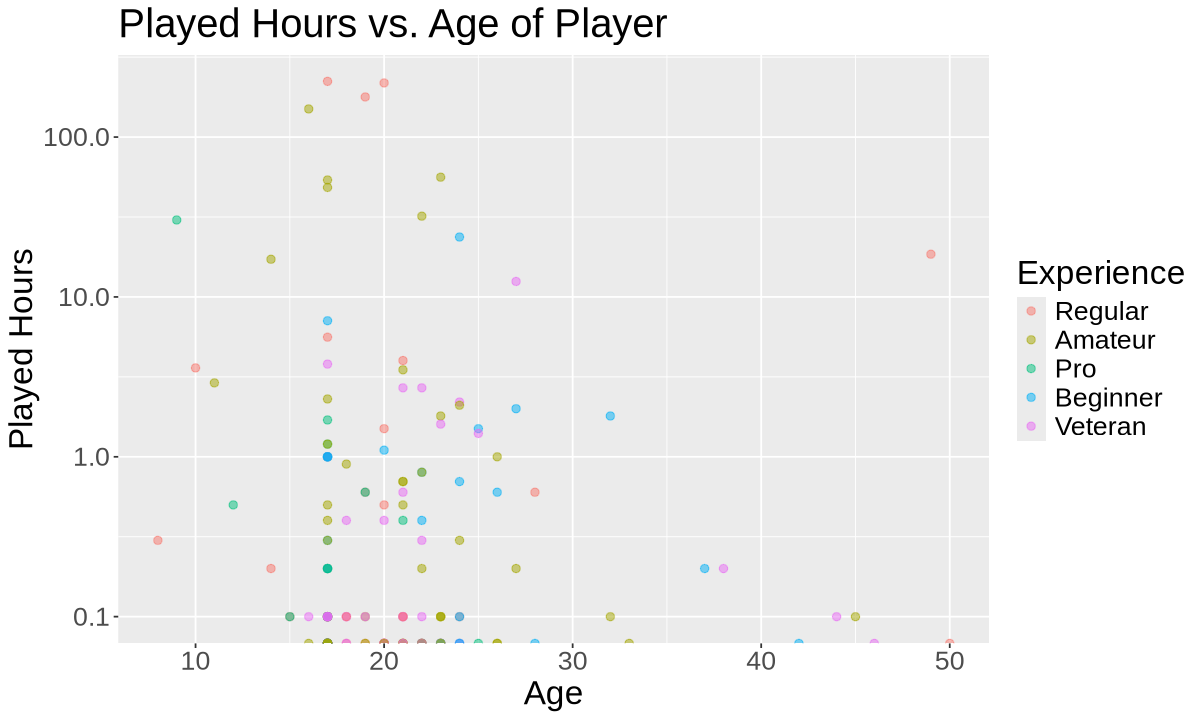

In [5]:
age_plot <- players_wrangled|>
    ggplot(aes(x = Age, y = played_hours, color = experience)) + 
        geom_point(alpha = 0.5, size = 2) + scale_y_log10(labels=comma)+
      labs(x = "Age", y= "Played Hours", color = "Experience", title = "Played Hours vs. Age of Player") +
        theme(text = element_text(size=20))
            options(repr.plot.width = 10, repr.plot.height = 6) 
age_plot

**Figure 1.1: The above figures shows the Played hours on the Minecraft game vs. the age of the players. The y-axis is shown on a logarithmic scale to allow better visualization. We can see that the data follows a very scattered pattern.**

#### Part 1B: Exploring Relationship between Played Hours vs. Gender

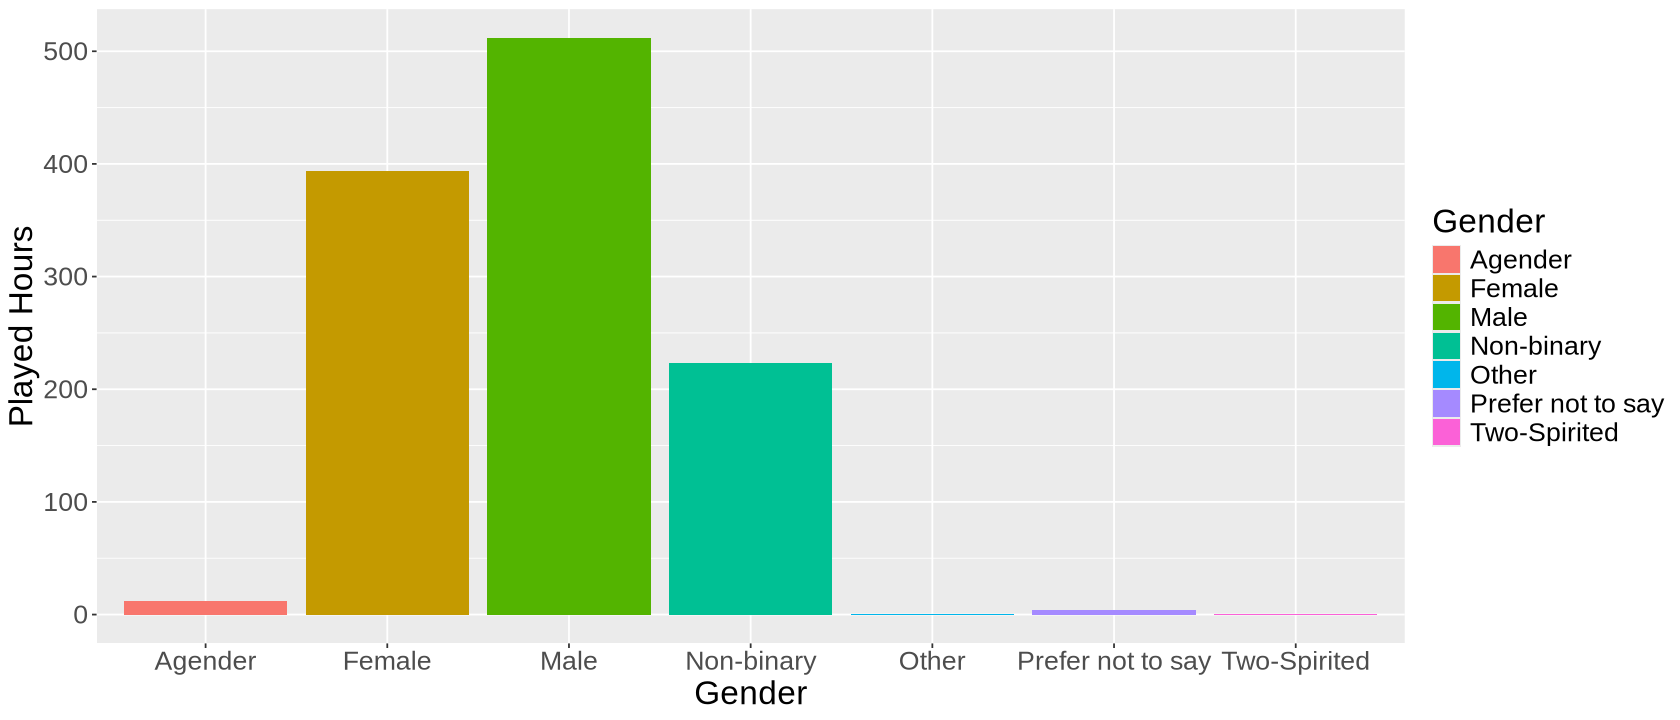

In [6]:
gender_plot <- players_wrangled|>
    ggplot(aes(x = gender, y =  played_hours, fill= gender)) + 
        geom_bar(stat = "identity") + 
      labs(x = "Gender", y= "Played Hours", fill = "Gender") +
        theme(text = element_text(size=20))
    options(repr.plot.width = 14, repr.plot.height = 6) 
gender_plot

**Figure 1.2: The above figures shows the Played hours on the Minecraft game vs. the gender of the players. From the graph, we can see that the most dominant gender group that plays the most hours on the Minecraft game is male, followed by female and non-binary.**

### Step Two: Defining the Target Variable

#### As mentioned in the Methodology section of this paper, we define "high data contributor" as the top 25% of `played_hours`, while a "low data contributor" is defined as the other 75%. 

In [7]:
players <- players_wrangled |> 
  mutate(high_contributor = if_else(played_hours >= quantile(played_hours, 0.75), "high", "low")) |> 
  mutate(high_contributor = factor(high_contributor))


players <- players |>
  mutate(gender = as.factor(gender),
         experience = as.factor(experience),
         high_contributor = as.factor(high_contributor))

write_csv(players, "players_contribute.csv")

### Step Three: Building the Model

#### Part 3A: Splitting and Preprocessing the Data

In [18]:
set.seed(123)

data_split <- initial_split(players, prop = 0.7, strata = high_contributor)
train_data <- training(data_split)
test_data <- testing(data_split) |>
    drop_na()

players_recipe <- recipe(high_contributor ~ Age + gender + experience, data = train_data) |>
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |>
  step_normalize(all_numeric_predictors())

train_data <- players |>
  select(Age, gender, experience, played_hours, high_contributor) |>
  drop_na() |>
  mutate(
    gender = as.factor(gender),
    high_contributor = as.factor(high_contributor)  # just in case
  )

str(train_data)
levels(train_data$gender)

summary(train_data$gender)

tibble [194 × 5] (S3: tbl_df/tbl/data.frame)
 $ Age             : num [1:194] 17 20 19 16 23 17 17 22 9 24 ...
 $ gender          : Factor w/ 7 levels "Agender","Female",..: 3 4 2 2 3 3 2 3 3 3 ...
 $ experience      : Factor w/ 5 levels "Regular","Amateur",..: 1 1 1 2 2 2 2 2 3 4 ...
 $ played_hours    : num [1:194] 223.1 218.1 178.2 150 56.1 ...
 $ high_contributor: Factor w/ 2 levels "high","low": 1 1 1 1 1 1 1 1 1 1 ...


[1] "Agender"           "Female"            "Male"             
[4] "Non-binary"        "Other"             "Prefer not to say"
[7] "Two-Spirited"

Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                0                11                 5

#### Part 3B: Training the Model 

In [19]:
set.seed(123)

folds <- vfold_cv(train_data, v=5, strata = high_contributor)

knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 8, by = 1))

knn_tune <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = folds, grid = k_vals) 

accuracies <- knn_tune |> 
    collect_metrics() |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4122537,5,0.02518109,Preprocessor1_Model1
2,accuracy,binary,0.4118556,5,0.03195466,Preprocessor1_Model2
3,accuracy,binary,0.5757760,5,0.05304279,Preprocessor1_Model3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,accuracy,binary,0.6595884,5,0.05281791,Preprocessor1_Model6
7,accuracy,binary,0.6602362,5,0.03835438,Preprocessor1_Model7
8,accuracy,binary,0.6654993,5,0.03952024,Preprocessor1_Model8


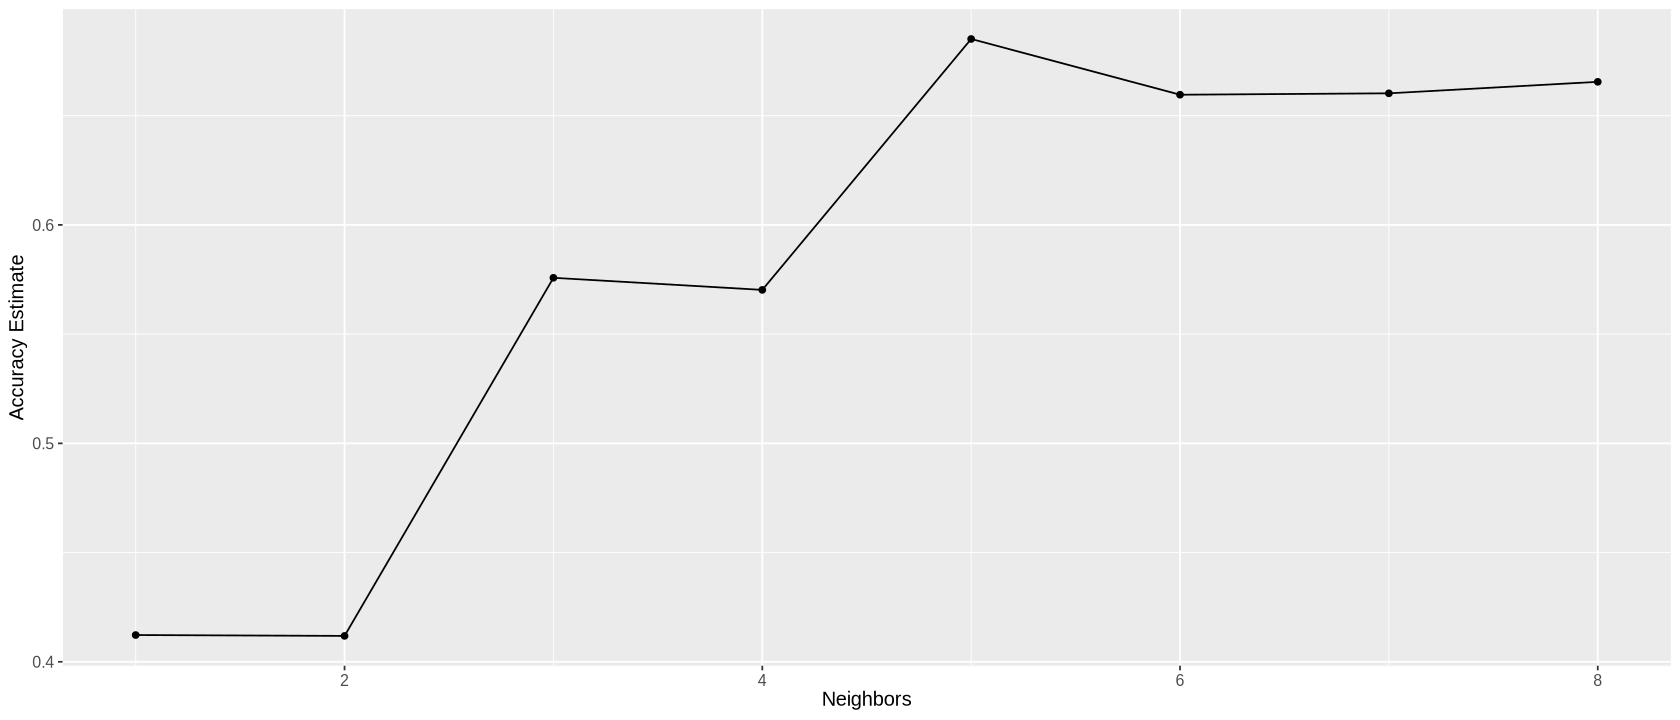

In [20]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

**Figure 3.1: The above graph shows the Accuracy Estimate vs. Number of Neighbours used in the K-NN Algorithm, according to a 5-fold cross validation of the training data. From the graph, it is observed that 5 neighburs yielded the best accuracy results.**

In [21]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 5

In [22]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
    fit(data=train_data)

players_predictions <- predict(knn_results, test_data) |>
   bind_cols(test_data)

players_predictions

.pred_class,played_hours,gender,Age,experience,high_contributor
<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
low,223.1,Male,17,Regular,high
low,218.1,Non-binary,20,Regular,high
low,53.9,Male,17,Amateur,high
⋮,⋮,⋮,⋮,⋮,⋮
low,0,Male,22,Regular,low
low,0,Agender,20,Veteran,low
low,0,Female,17,Beginner,low


In [23]:
## Accuracy Value
players_predictions |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7457627


In [24]:
## Precision Value
players_predictions |> pull(high_contributor) |> levels()

players_predictions |>
  precision(truth = high_contributor, estimate = .pred_class, event_level = "first")


[1] "high" "low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5714286


In [25]:
## Recall Value

players_predictions  |>
  recall(truth =high_contributor, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.25



| Metric | Value | 
|---------|-------|
| Accuracy   | 74.57627%   | 
| Precision  | 57.14286%    |
| Recall   | 25%   | 

**Table 3.2: The above table shows the accuracy, precision and recall value of the first model**

In [26]:
confusion <- players_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion

          Truth
Prediction high low
      high    4   3
      low    12  40

**Table 3.3: The above table shows the confusion matrix generated via the first model. The horizontal row shows the truth (based on** `high_contributor` **factor), while the vertical row shows the prediction by the model.**

#### Part 3C: Alternative Tuning of the Classifier
##### Note: We also experimented with an alternative tuning setup (a second train/validation split within the training data), which suggested `k = 9` as optimal. However, this model performed slightly worse on the test set (accuracy: 71.2%), so we proceeded with the model from Part 3B as our final classifier.

In [27]:
# create the 25/75 split of the training data into training and validation
player_split <- initial_split(train_data, prop = 0.75, strata = high_contributor)
player_subtrain <- training(player_split)
player_validation <- testing(player_split)

# recreate the standardization recipe from before (since it must be based on the training data)
player_tc_recipe <- recipe(high_contributor ~ Age + experience + gender, data = player_subtrain) 

# fit the knn model (we can reuse the old knn_spec model from before)
knnn_fit <- workflow() |>
  add_recipe(player_tc_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_subtrain)

In [28]:
## Get predictions on the validation data
validation_predicted <- predict(knnn_fit, player_validation) |>
  bind_cols(player_validation)

## Get the accuracy for the validation data
acc <- validation_predicted |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc

[1] 0.62

In [34]:
players_vfold_5 <- vfold_cv(player_subtrain, v = 5, strata = high_contributor)

player_split <- initial_split(train_data, prop = 0.75, strata = high_contributor)
player_subtrain <- training(player_split)
player_validation <- testing(player_split)

player_tc_recipe <- recipe(high_contributor ~ Age + experience + gender, data = player_subtrain) 

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [35]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(player_tc_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold_5, grid = k_vals) |>
  collect_metrics()

accuraciess <- knn_results |>
  filter(.metric == "accuracy")

accuraciess

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4793103,5,0.01758283,Preprocessor1_Model01
2,accuracy,binary,0.5002463,5,0.01556019,Preprocessor1_Model02
3,accuracy,binary,0.5770936,5,0.04926663,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.6320197,5,0.01307044,Preprocessor1_Model08
9,accuracy,binary,0.7017241,5,0.01958244,Preprocessor1_Model09
10,accuracy,binary,0.7086207,5,0.01973366,Preprocessor1_Model10


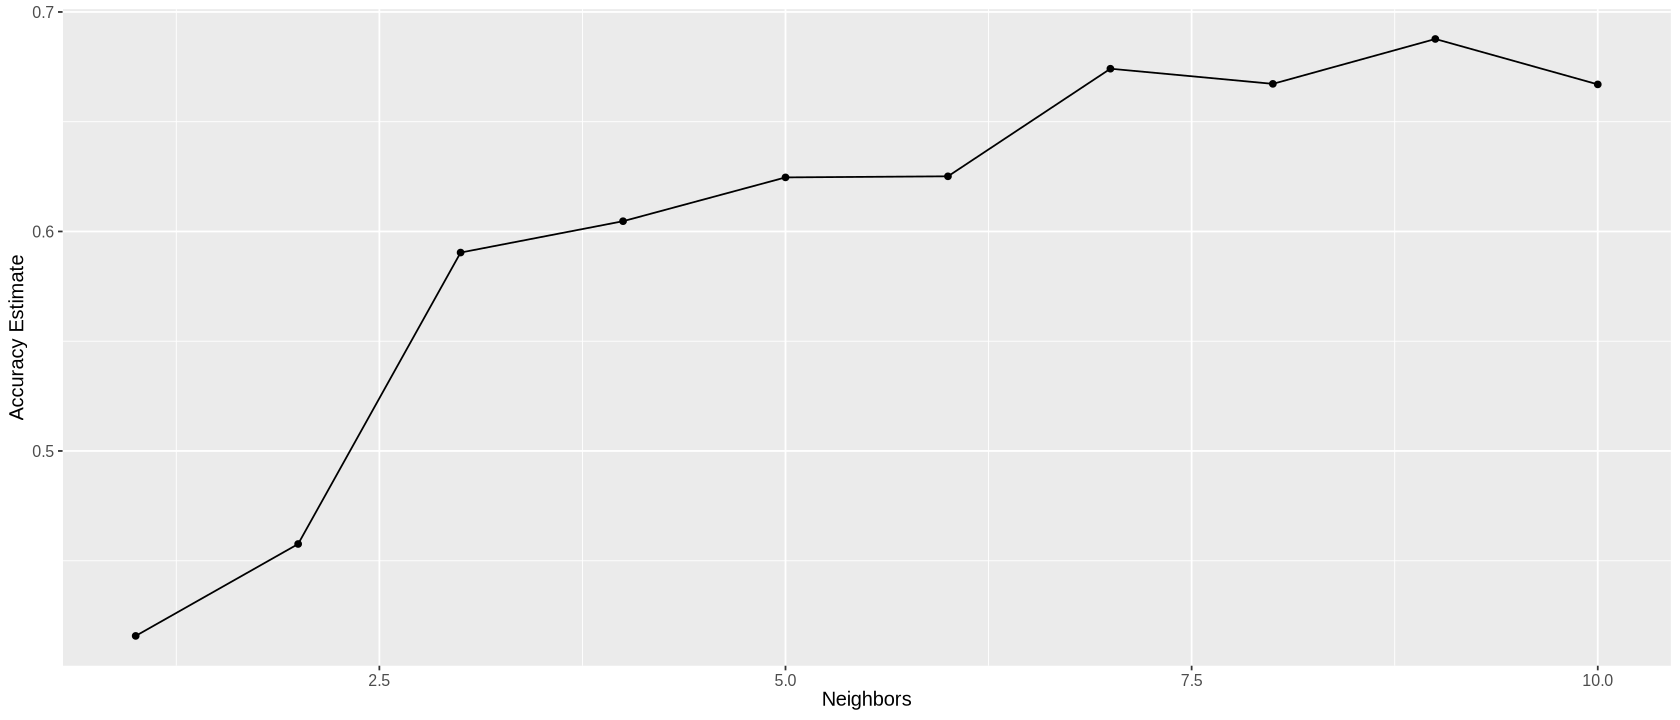

In [36]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

**Figure 3.4: The above graph shows the Accuracy Estimate vs. Number of Neighbours used in the K-NN Algorithm, according to a 5-fold cross validation of re-splitting of the training data. From the graph, it is observed that 9 neighbours yielded the best accuracy results.**

In [37]:
best_k <- accuraciess |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 10

In [38]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_data)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3505155
Best kernel: rectangular
Best k: 10

In [39]:
players_test_predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

## Accuracy Value
players_test_predictions |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7118644


In [40]:
## Precision Value
players_test_predictions |> pull(high_contributor) |> levels()

players_test_predictions |>
  precision(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "high" "low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.4


In [41]:
## Recall Value
players_test_predictions |> pull(high_contributor) |> levels()

players_test_predictions |>
  recall(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "high" "low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.125


| Metric | Value | 
|---------|-------|
| Accuracy   | 70.7118644%   | 
| Precision  | 40%    |
| Recall   | 12.5%   | 

**Table 3.5: The above table shows the accuracy, precision and recall value of the alternative model. However the first model had higher values of accuracy, precision and recall, which is why we proceed with using the first model in the discussion section.**

In [42]:
confusion_alt <- players_test_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion_alt

          Truth
Prediction high low
      high    2   3
      low    14  40

**Table 3.6: The above table shows the confusion matrix generated via the alternative model. The horizontal row shows the truth (based on**`high_contributor` **factor), while the vertical row shows the prediction by the model.**

## Discussion

The goal of this project is to identify the types of gamers most likely to provide a significant amount of based on demographic and background factors `age`, `gender` and `experience`. A K-Nearest Neighbours (k-NN) model to constructed to predict whether a player will be a "high data contributor" (in the top 25% of played hours) or a "low data contributor" (in the bottom 75%) by framing this as a classification challenge.

#### The Visuals
According to **Figure 1.1** and **Figure 1.2**, the relationship between gender, age, experience and played hours were not obvious. Therefore, a K-Nearest Neighbours model was chosen rather than a linear-regression due to the lack of a linear trend. While male players represented the highest total played hours, this could reflect a skew in the player sample rather than an actual predictive relationship. The model's moderate accuracy also suggests that while there are patterns, the combination of the three variables were not ideal predictors to determine the amount of data a player contributes.

#### The Model
After testing multiple values for the number of neighbors (k), from Figure 3.1, the model with `k = 5` (trained using 5-fold cross-validation) performed with the highest accuracy. With a test-set accuracy of roughly 74.6%, our final model demonstrated a moderate capacity to predict high-contributing individuals based on some personal traits. It is also noted that the precision was 54% and the recall was 25%. 

#### The Impacts and Future Possibilities
These findings shows a decent model to improve targeted recruitment efforts in video game research. Beyond this project, similar approaches could be used in game development or online education platforms to identify high-engagement users early on. While the produced model still has its limitations (discussed in the latter part of this discussion), this model can help with optimizing outreach/marketing strategies, and better allocation of server resources. This project also opens the door to different future directions, such as how in-game behaviours or personality traits could affect data contribution, as well as if clustering techniques could uncover potential subgroups of players with different engagement patterns.

#### Limitations and Suggestions for Improvement
While a model was successfully built, encountering limitations were inevitable. First, the `players.csv` file only had factors such as age, gender, and experience that could be used. Future models would including behavioral features from the `sessions.csv` file (e.g., session frequency, duration) could improve accuracy, precision and recall. It must also be noted that recall should be the most important metric that should be maximalized since we would not want to miss a high data contribution in recruiting efforts. 

Next, there was a limited sample size. With only 196 observations recorded, the model struggled to generalize, as well as the presence of a class imbalance. From the modified `players_contribute.csv`, it can be observed that the cutoff for "high data contributor" was at 0.6 hours. However, 0.6 hours isn't a long play session and categorizing them as "high data contributors" could waste a lot of future recuriting efforts. In the future, increasing the sample size as well as setting a more reasonable quartile definition of high or low contributors could improve the model's predictions.

Finally, there are some problems with the quality of the data. Performance might have been impacted by missing or ambiguous values (such as those related to gender, experience, or age). Improved data collecting or preparation techniques might be beneficial for future models.


## References

[1] Cipollone, M., & Schifter, C. (2014, April). (PDF) Minecraft as a creative tool: A case study. ResearchGate. https://www.researchgate.net/publication/287093943_Minecraft_as_a_creative_tool_A_case_study

[2] Peng, T. T., Trevor Campbell, and Melissa Lee Foreword by Roger. (n.d.). Data Science. In datasciencebook.ca. https://datasciencebook.ca/